In [1]:
import pandas as pd

file_path = '../data/processed/kanye_lyrics_with_features.csv'
data = pd.read_csv(file_path)

data.head()


,title,artist,lyrics,view_count,gunning_fog_index,average_line_length,sentiment,word_count,free_count,most_common_word,most_common_word_count
0,Heartless,Kanye West,"[ Chorus ] night , hear 'em talk coldest story...",1341214,9.01,1053.0,-0.9939,311,0,heartless,12
1,Stronger,Kanye West,"[ Produced Kanye West , Mike Dean , Timbaland ...",1589284,30.64,2621.0,0.9962,802,0,ya,26
2,Gold Digger,Kanye West,[ Produced Kanye West Jon Brion ] [ Intro : Ja...,2243402,35.58,2121.0,0.9944,788,0,got,28
3,Jesus Walks,Kanye West,"[ Intro ] war war terrorism , racism war [ Cho...",1236255,27.08,1472.0,-0.9949,438,0,Jesus,18
4,All of the Lights,Kanye West,[ Produced Kanye West ; Co-Produced Jeff Bhask...,1844898,70.21,1689.0,0.7003,488,0,lights,34


In [2]:
summary_statistics = data.describe()
print("Summary Statistics:")
print(summary_statistics)


Summary Statistics:
         view_count  gunning_fog_index  average_line_length  sentiment  \
count  1.000000e+01          10.000000            10.000000  10.000000   
mean   1.936890e+06          30.417000          1665.200000  -0.029410   
std    7.750439e+05          17.479937           492.693233   1.020857   
min    4.959840e+05           9.010000          1053.000000  -0.997600   
25%    1.403232e+06          22.342500          1350.500000  -0.993700   
50%    2.044150e+06          25.500000          1613.000000  -0.145850   
75%    2.446746e+06          34.345000          1956.500000   0.992750   
max    2.981993e+06          70.210000          2621.000000   0.998700   

       word_count  free_count  most_common_word_count  
count   10.000000        10.0                10.00000  
mean   510.600000         0.0                24.90000  
std    171.932933         0.0                11.32794  
min    311.000000         0.0                12.00000  
25%    421.500000         0.0    

In [3]:
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
title                     0
artist                    0
lyrics                    0
view_count                0
gunning_fog_index         0
average_line_length       0
sentiment                 0
word_count                0
free_count                0
most_common_word          0
most_common_word_count    0
dtype: int64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set(style="whitegrid")

In [6]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

<Figure size 1500x1500 with 0 Axes>

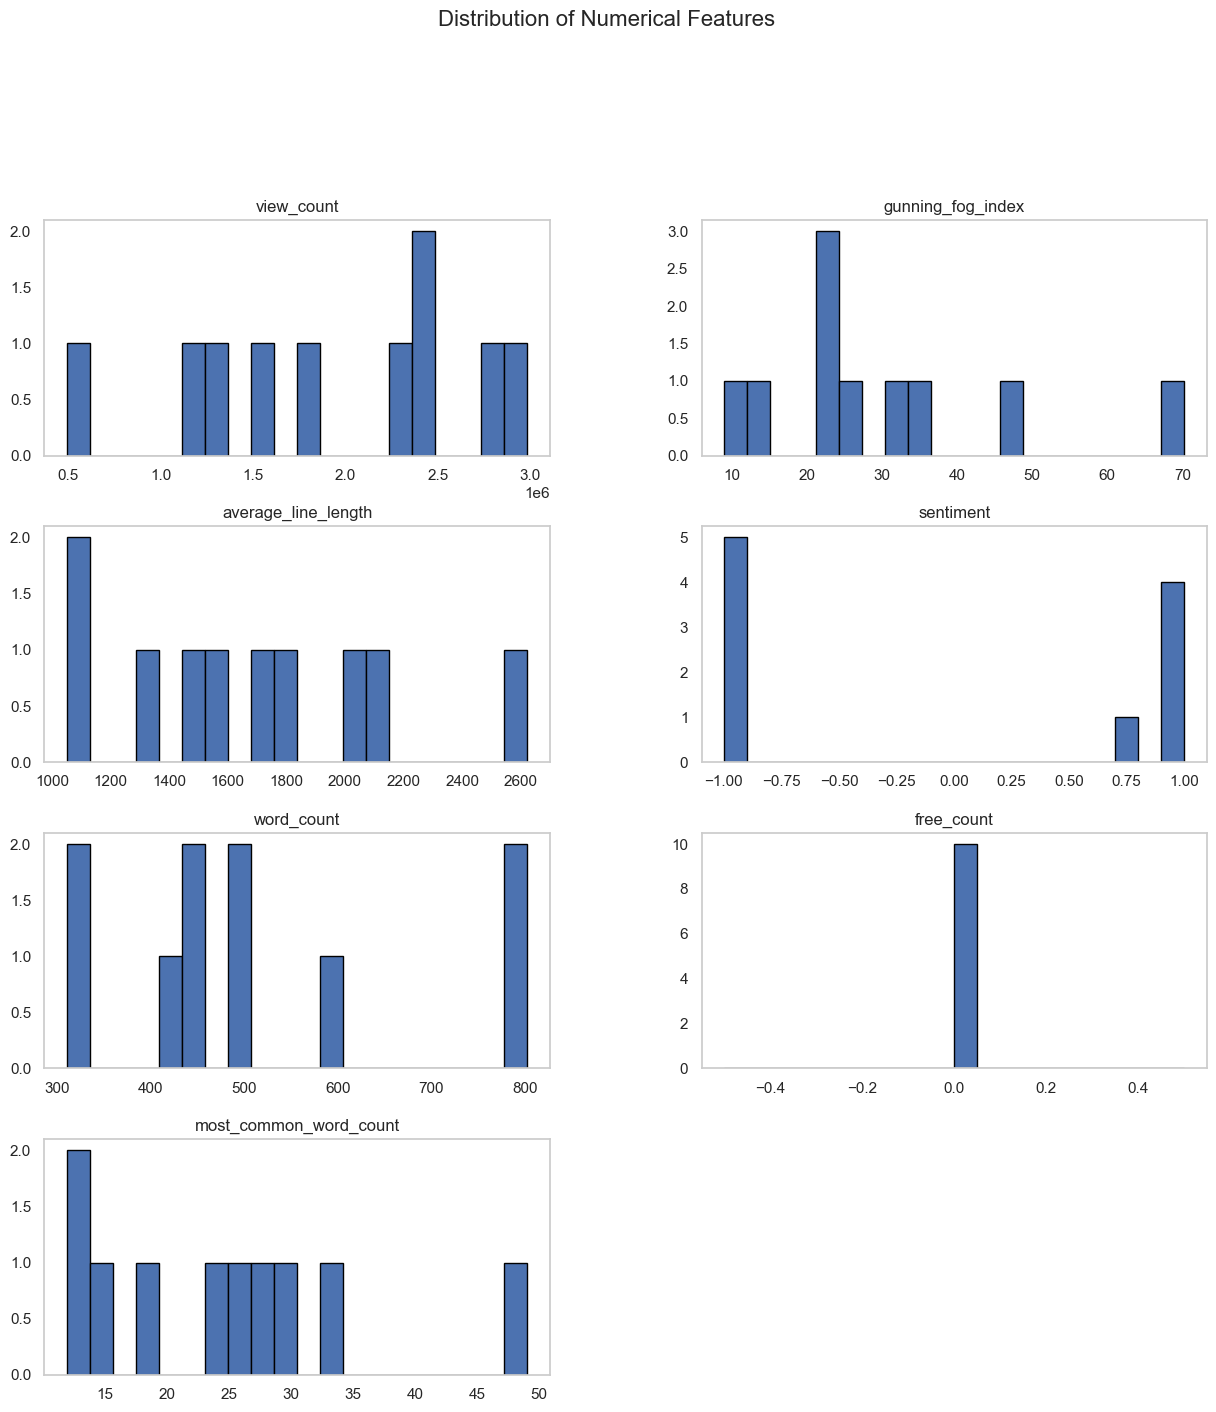

In [8]:
plt.figure(figsize=(15, 15))  # Increase the figure size
data[numerical_features].hist(bins=20, edgecolor='black', grid=False, layout=(4, 2), figsize=(15, 15))  # Use layout (4, 2) or (2, 4)
plt.suptitle('Distribution of Numerical Features', y=1.02, fontsize=16)
plt.show()

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
file_path = '../data/processed/kanye_lyrics_with_features.csv'

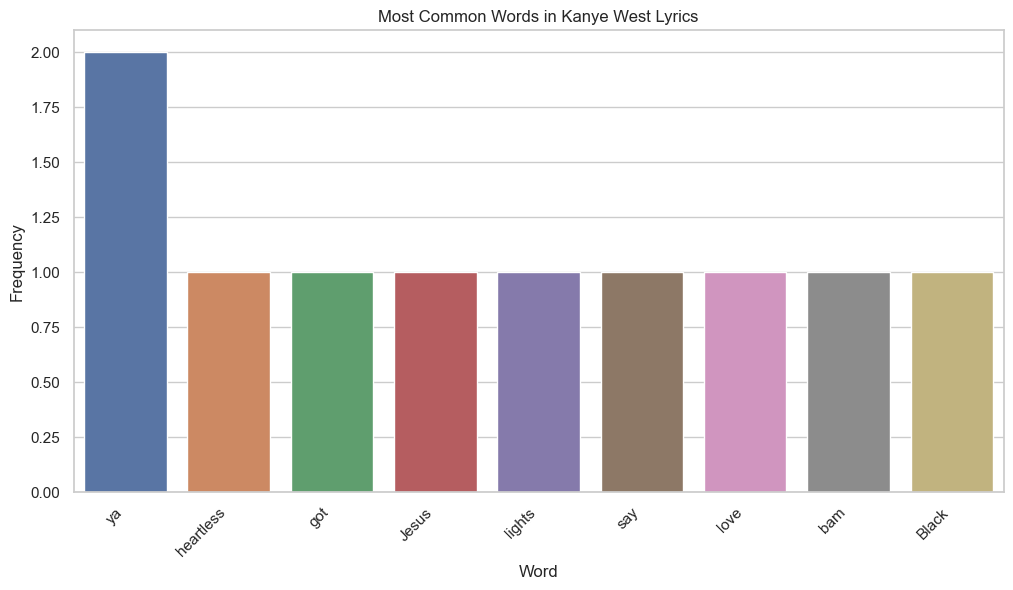

In [11]:
#plot for the most common words
plt.figure(figsize=(12, 6))
sns.countplot(x='most_common_word', data=data, order=data['most_common_word'].value_counts().index)
plt.title('Most Common Words in Kanye West Lyrics')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

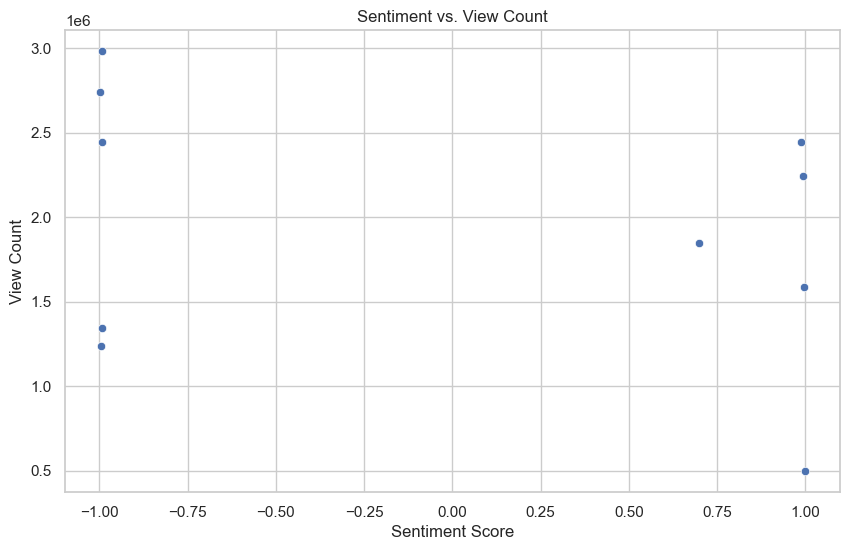

In [12]:
#plot for sentiment vs. view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentiment', y='view_count', data=data)
plt.title('Sentiment vs. View Count')
plt.xlabel('Sentiment Score')
plt.ylabel('View Count')
plt.show()

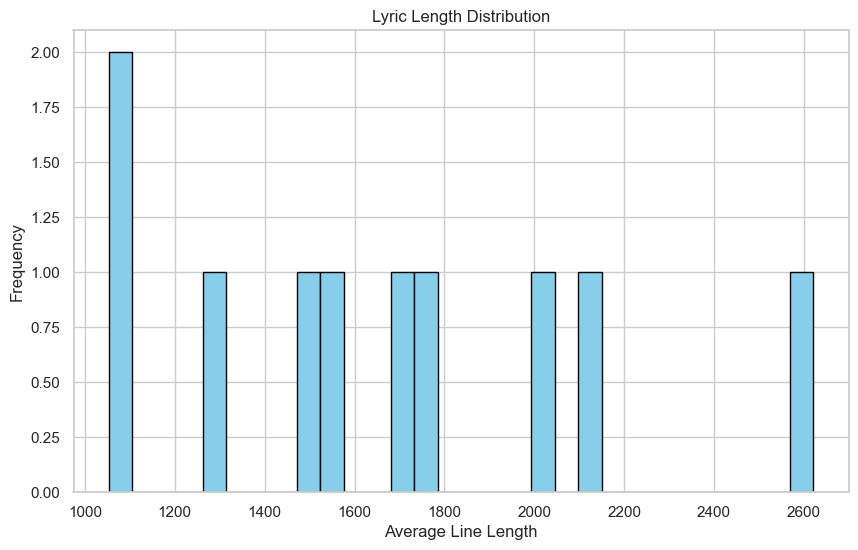

In [14]:
#plot for histogram of lyric lengths
plt.figure(figsize=(10, 6))
plt.hist(data['average_line_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Lyric Length Distribution')
plt.xlabel('Average Line Length')
plt.ylabel('Frequency')
plt.show()

In [24]:
import numpy as np

In [26]:
lyric_lengths = [1053.0, 2621.0, 2121.0, 1472.0, 1689.0]

In [27]:
mean_length = np.mean(lyric_lengths)
median_length = np.median(lyric_lengths)
mode_length = max(set(lyric_lengths), key=lyric_lengths.count)

In [28]:
print(f"Mean: {mean_length}")
print(f"Median: {median_length}")
print(f"Mode: {mode_length}")

Mean: 1791.2
Median: 1689.0
Mode: 1472.0


In [17]:
from nltk.tokenize import word_tokenize

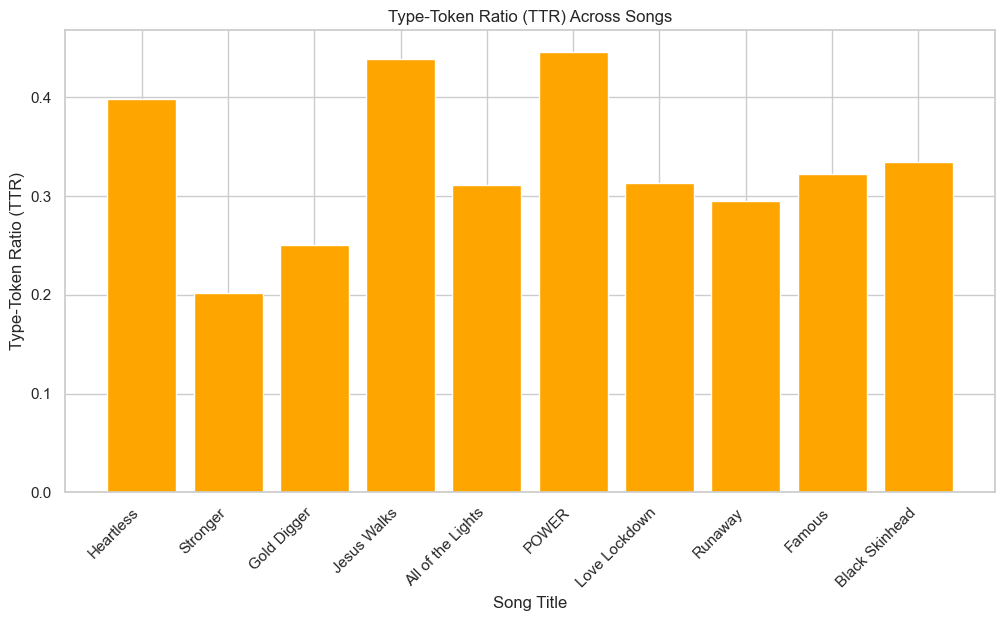

In [18]:
data['unique_words'] = data['lyrics'].apply(lambda x: len(set(word_tokenize(x.lower()))))
data['total_words'] = data['lyrics'].apply(lambda x: len(word_tokenize(x.lower())))
data['ttr'] = data['unique_words'] / data['total_words']

# TTR across different songs
plt.figure(figsize=(12, 6))
plt.bar(data['title'], data['ttr'], color='orange')
plt.title('TTR Across Songs')
plt.xlabel('Song Title')
plt.ylabel('TTR')
plt.xticks(rotation=45, ha='right')
plt.show()

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

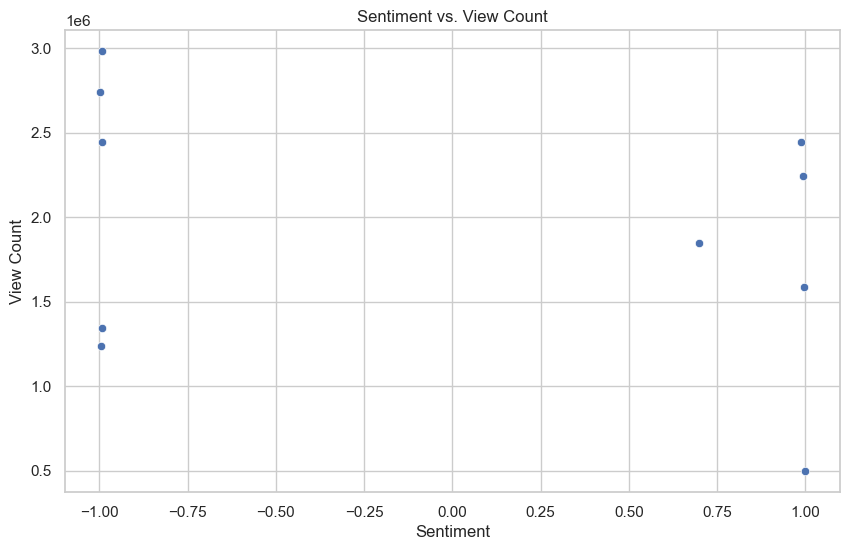

In [20]:
#sentiment vs. view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sentiment', y='view_count', data=data)
plt.title('Sentiment vs. View Count')
plt.xlabel('Sentiment')
plt.ylabel('View Count')
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/kanye-time/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


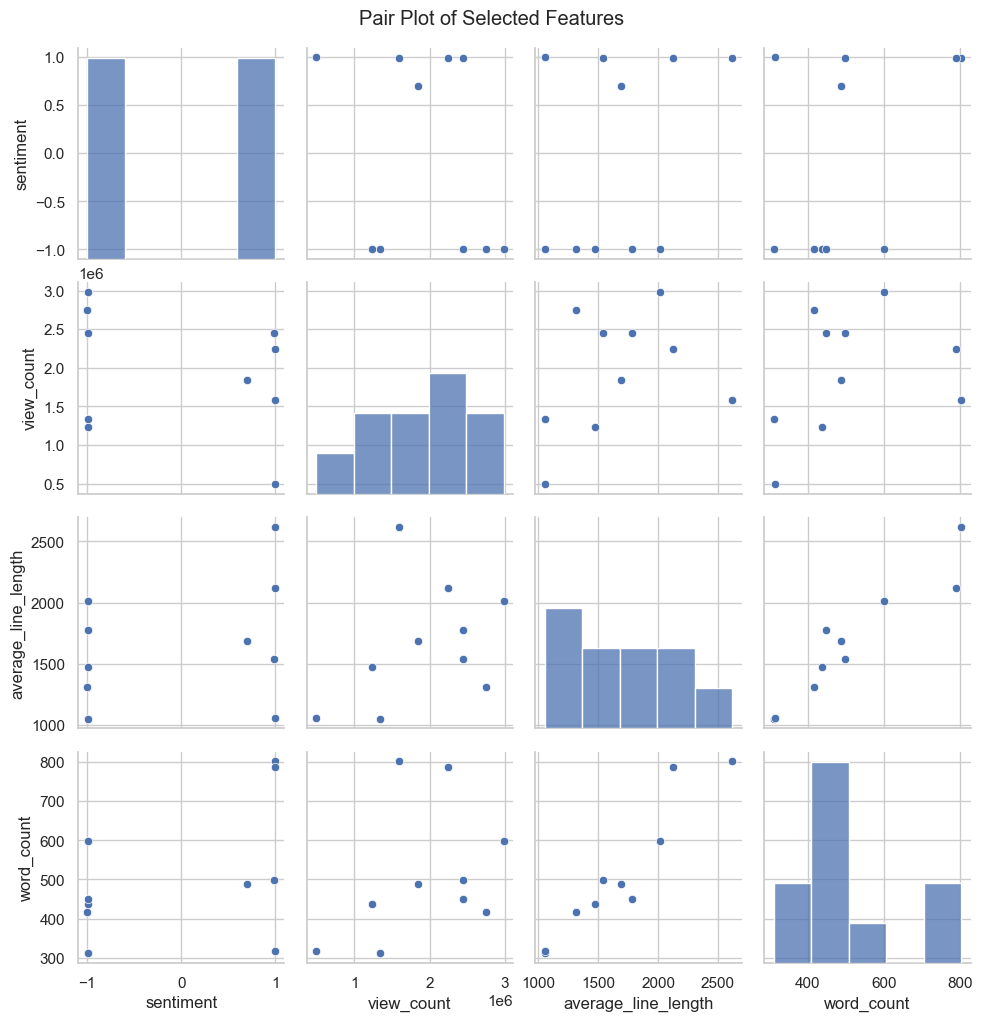

In [22]:
sns.pairplot(data[['sentiment', 'view_count', 'average_line_length', 'word_count']])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

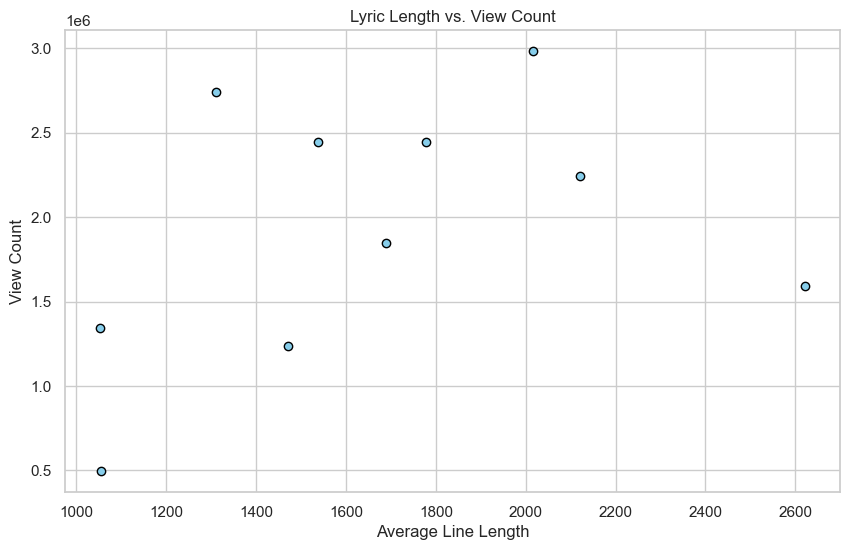

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(data['average_line_length'], data['view_count'], color='skyblue', edgecolor='black')
plt.title('Lyric Length vs. View Count')
plt.xlabel('Average Line Length')
plt.ylabel('View Count')
plt.show()

In [ ]:
#the dataset consists of lyrics from Kanye West songs

#there is a concentration of songs with an average line length around 1000 characters
#the bars with a peak at 1.00 suggest that there are various songs with different average line lengths

#the average lyric length across the songs is 1791.2 characters
#the median lyric length is 1689 characters
#the mode is 1472 due to this lyric length appearing most frequently in the dataset

#the influence of lyric length on view count is not straightforward

#the correlation coefficient of approximately 0.37
#songs with longer lyric lines tend to have higher view counts

#Heatless has a relatively low type-token ratio, indicating a moderate level of vocabulary diversity.
#Jesus Walks shows a higher type token ratio
#Power has a high type-token ratio

#Summary:
    #while there is a general trend of increasing view count with longer average line lengths, the relationship is not strictly linear 
    #songs with shorter lyrics can still have high view counts, and vice versa